In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pandas as pd


In [2]:
f = open('/gpfs/home3/eilia/calibration_project/output/cal_metrics_improved_model_new.json')

data_improved_model = json.load(f)

f.close()

In [3]:
data_improved_model.keys()

dict_keys(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'])

In [4]:
data_improved_model['0'].keys()

dict_keys(['tvd_biased', 'tvd_unbiased', 'ent_diff_biased', 'ent_diff_unbiased'])

### Total Variation Distance

In [5]:
print('Altered TVD metrics (mean, st. dev., min, max)')
for key in data_improved_model.keys():
    print('Proportion of changed model samples:', key)
    tvd_biased_array = np.array(data_improved_model[key]['tvd_biased'])
    np.mean(tvd_biased_array), np.std(tvd_biased_array), np.min(tvd_biased_array), np.max(tvd_biased_array)
    print('Unbiased dist. and human maj. as truth', np.mean(tvd_biased_array), np.std(tvd_biased_array), np.min(tvd_biased_array), np.max(tvd_biased_array))

Altered TVD metrics (mean, st. dev., min, max)
Proportion of changed model samples: 0
Unbiased dist. and human maj. as truth 0.6303476397239073 0.22512415859208224 0.000292544427793473 0.9999999403953552
Proportion of changed model samples: 0.1
Unbiased dist. and human maj. as truth 0.6093055956403766 0.23233842133834498 0.0 0.9999999403953552
Proportion of changed model samples: 0.2
Unbiased dist. and human maj. as truth 0.5852809020072306 0.23331636757432594 0.0 0.9999999403953552
Proportion of changed model samples: 0.3
Unbiased dist. and human maj. as truth 0.5646417661174712 0.23483758504276048 0.0 0.9999999403953552
Proportion of changed model samples: 0.4
Unbiased dist. and human maj. as truth 0.541072466477071 0.23242891361795506 0.0 0.9999999403953552
Proportion of changed model samples: 0.5
Unbiased dist. and human maj. as truth 0.5223151841370723 0.2296851985370149 0.0 0.9999999403953552
Proportion of changed model samples: 0.6
Unbiased dist. and human maj. as truth 0.503920

In [6]:
tvd_biased = {}
tvd_unbiased = {}
ent_diff_biased = {}
ent_diff_unbiased = {}
for proportion in data_improved_model.keys():
    for metric in data_improved_model[str(proportion)].keys():
        if metric == 'tvd_biased':
            tvd_biased[proportion] = data_improved_model[str(proportion)][metric]
        elif metric == 'tvd_unbiased':
            tvd_unbiased[proportion] = data_improved_model[str(proportion)][metric]
        elif metric == 'ent_diff_biased':
            ent_diff_biased[proportion] = data_improved_model[str(proportion)][metric]
        else:
            ent_diff_unbiased[proportion] = data_improved_model[str(proportion)][metric]

In [7]:
def convert_to_list(dict_metric):
    list_change = []
    list_metric = []
    for key in dict_metric.keys():
        for i in range(len(dict_metric[key])):
            list_change.append(key)
            list_metric.append(dict_metric[key][i])
    return list_change, list_metric

In [8]:
list_change, list_metric = convert_to_list(tvd_biased)
df_tvd_biased = pd.DataFrame({'change': list_change, 'value': list_metric})

Text(0.5, 0.98, 'Histogram of TVD Values with varying proportion of the model data improved')

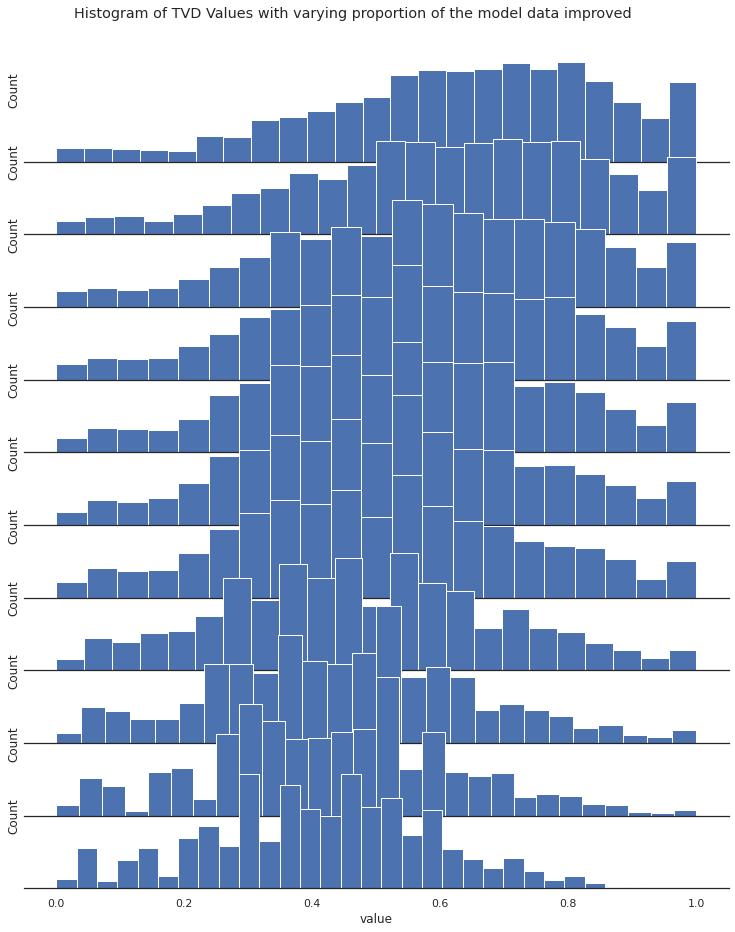

In [9]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

palette = sns.color_palette("Set2", 11)

g = sns.FacetGrid(df_tvd_biased, palette=palette, row="change", aspect=9, height=1.2)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1)
#g.map_dataframe(sns.histplot, x="value", color='blue')


g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

plt.suptitle('Histogram of TVD Values with varying proportion of the model data improved', y=0.98)

In [11]:
list_change, list_metric = convert_to_list(tvd_unbiased)
df_tvd_unbiased = pd.DataFrame({'change': list_change, 'value': list_metric})

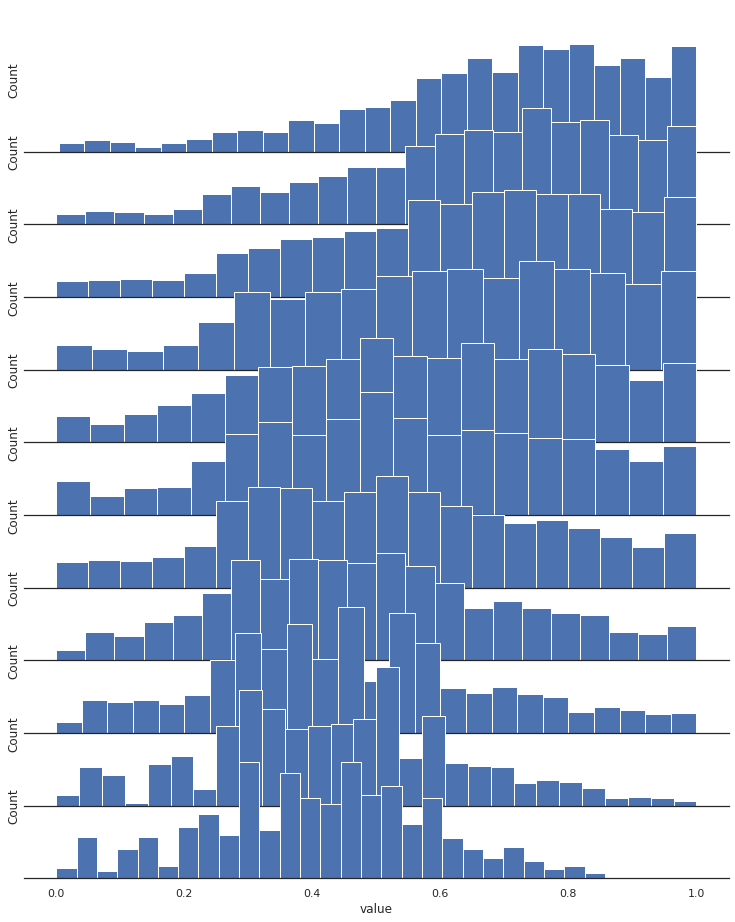

In [12]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

palette = sns.color_palette("Set2", 11)

g = sns.FacetGrid(df_tvd_unbiased, palette = palette, row="change", aspect=9, height=1.2)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1)
#g.map_dataframe(sns.histplot, x="value", color='blue')

g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

### Absolute entropy difference

In [13]:
def convert_to_list(dict_metric):
    list_change = []
    list_metric = []
    for key in dict_metric.keys():
        for i in range(len(dict_metric[key])):
            list_change.append(key)
            list_metric.append(abs(dict_metric[key][i]))
    return list_change, list_metric

In [14]:
list_change, list_metric = convert_to_list(ent_diff_biased)
df_ent_diff_biased = pd.DataFrame({'change': list_change, 'value': list_metric})

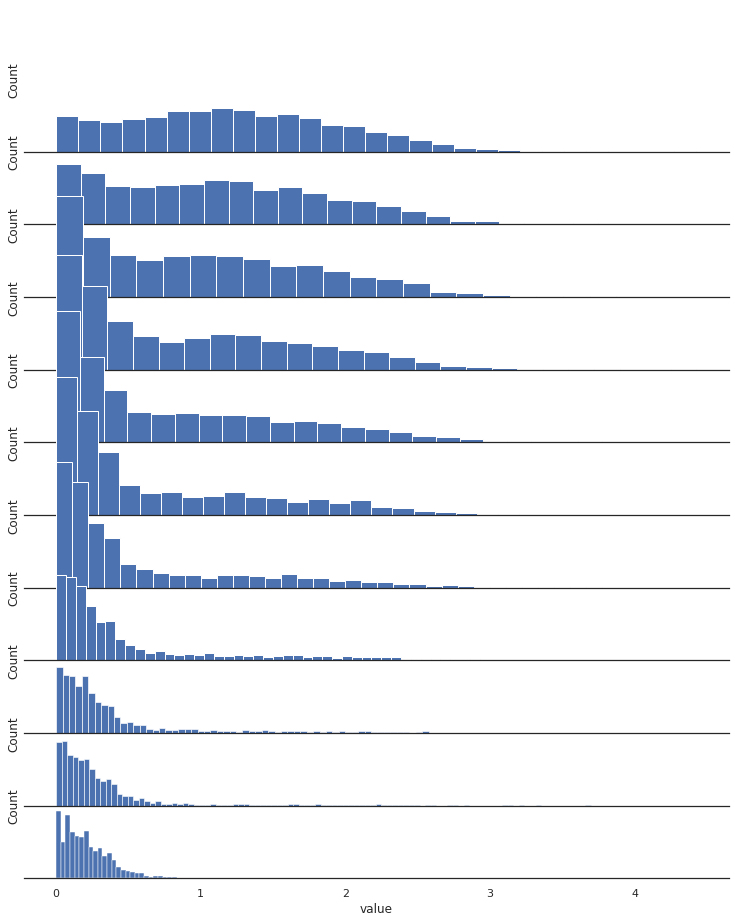

In [15]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

palette = sns.color_palette("Set2", 11)

g = sns.FacetGrid(df_ent_diff_biased, palette = palette, row="change", aspect=9, height=1.2)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1)
#g.map_dataframe(sns.histplot, x="value", color='blue')

g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

In [16]:
list_change, list_metric = convert_to_list(ent_diff_unbiased)
df_ent_diff_unbiased = pd.DataFrame({'change': list_change, 'value': list_metric})

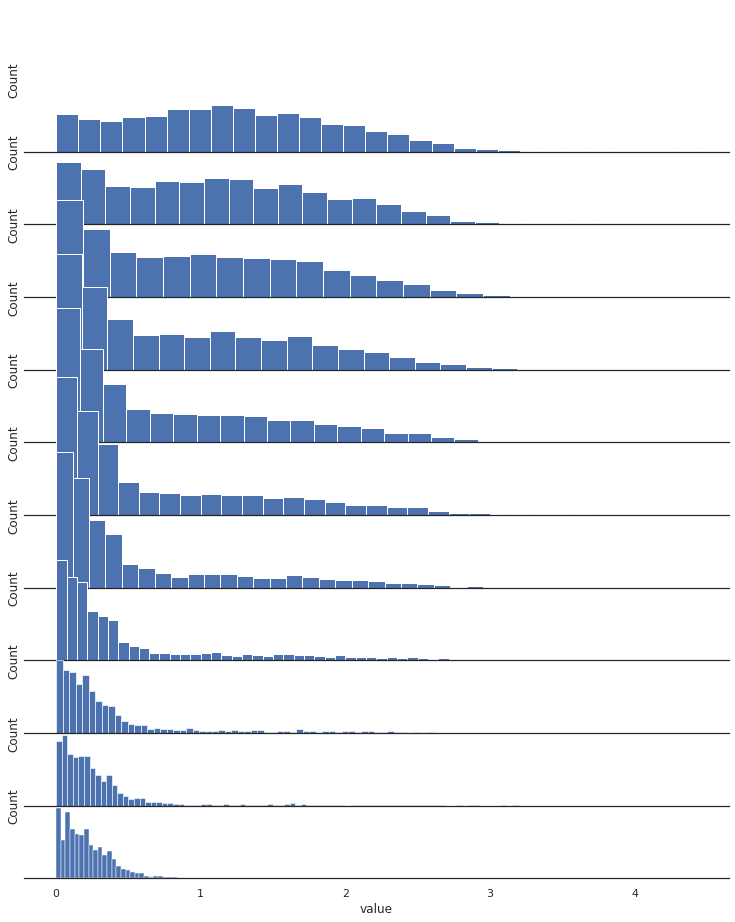

In [17]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df_ent_diff_unbiased, row="change", aspect=9, height=1.2)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1)
#g.map_dataframe(sns.histplot, x="value", color='blue')

g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)